<a href="https://colab.research.google.com/github/tonyscan6003/etivities/blob/main/Example_6_1_DeepFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[DeepFace](https://pypi.org/project/deepface/) 
is a Facial Recognition framework for python. It wraps state of the art models including:VGG-Face, FaceNet, OpenFace, DeepFace (Facebook), ArcFace 
<div>
<img src="https://raw.githubusercontent.com/serengil/deepface/master/icon/deepface-icon-labeled.png" width=200>
<div>


#HouseKeeping
Install deepface Pypi project.

In [ ]:
pip install deepface

Import packages

In [ ]:
import matplotlib.pyplot as plt
from deepface import DeepFace
import requests
import urllib.request
import numpy as np
import cv2


Select two images from the web for face verification.  (A group image is suitable to show multiple detections at different scales)

In [ ]:
# verification image
image_url1 = "https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Barack_Obama_at_Las_Vegas_Presidential_Forum.jpg/640px-Barack_Obama_at_Las_Vegas_Presidential_Forum.jpg"
image_url2 = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/President_Barack_Obama.jpg/615px-President_Barack_Obama.jpg"


Read images to array (for plotting) and save to disk for access by DeepFace methods.

In [ ]:
def url_to_image(url):
	resp = urllib.request.urlopen(url)
	temp_image = np.asarray(bytearray(resp.read()), dtype="uint8")
	temp_image = cv2.imdecode(temp_image, cv2.IMREAD_COLOR)
	temp_image = cv2.cvtColor(temp_image, cv2.COLOR_BGR2RGB) # OpenCV defaults to BGR, but we need RGB here..
	return temp_image

img1 = url_to_image(image_url1)
img2 = url_to_image(image_url2)
    

#Face Detection using DeepFace
Facial recognition systems generally use Face detection as the intial step in the recognition process. Deep face has implementations of a number of detectors, these can be set as an argumement in the 'verify' or 'find' methods used to call the face recognition models. However the deepFace detector framework also allows us to directly access the face detector using  'detectFace' method. The availble methods are listed in the code cell below.

In [ ]:
detectors = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']

In [ ]:
face = DeepFace.detectFace(img2, target_size = (224, 224), detector_backend = detectors[2])

In [ ]:

plt.figure(figsize=(4,4))
plt.axis =('off')
plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))

#Facial verification using DeepFace
We can apply facial verification and identification using the Deepface framework. We can use any of the selection of models listed in the code cell below. You can test facial verification by obtaining image pairs from the web (Change web links above). (Facial verification requires your own database of faces and that is not setup in this notebook). With repeated testing it is possible discover [biases](http://proceedings.mlr.press/v81/buolamwini18a/buolamwini18a.pdf) (Age,gender,race) in facial detection models. 

In [ ]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]

In [ ]:
result = DeepFace.verify(img1, img2, model_name = models[1])

In [ ]:
label = result['verified']
model_used = result['model']
distance_val = result['distance']
similarity_metric = result['similarity_metric']
f, axarr = plt.subplots(1,2,figsize=(6,20))
label_str = ('Matched Pair','Mismatched Pair')

axarr[0].imshow(img1)
axarr[0].axis('off')
axarr[0].set_title('Verified ='+str(label)+'\n  Model ='+model_used+'\n  Disance ='+str(distance_val))
axarr[1].imshow(img2)
axarr[1].axis('off')
plt.show()

#Face Attributes
Face detection also allows multiple attributes to obtained as discussed in the [Hyperface paper](https://engineering.jhu.edu/vpatel36/wp-content/uploads/2019/02/Hyperface_v3.pdf)

In [ ]:
demography = DeepFace.analyze(img2, detector_backend = detectors[2])


facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 23.5MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:06<00:00, 80.7MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:11<00:00, 44.9MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:22<00:00, 24.2MB/s]
Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 150ms/step


Action: age:  25%|██▌       | 1/4 [00:00<00:01,  1.79it/s]    

1/1 [==============================] - 1s 835ms/step


Action: gender:  50%|█████     | 2/4 [00:01<00:01,  1.04it/s]

1/1 [==============================] - 1s 789ms/step


Action: race:  75%|███████▌  | 3/4 [00:02<00:00,  1.10it/s]  

1/1 [==============================] - 1s 766ms/step


Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


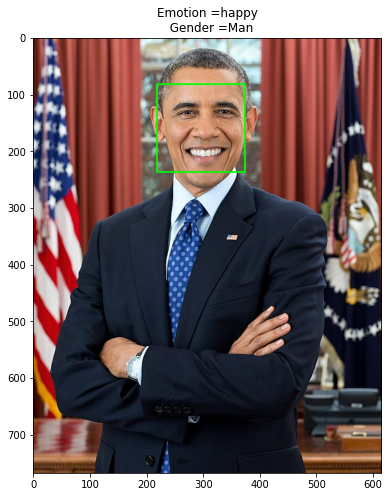

In [ ]:
#Determine Bounding boxes
emo = demography['dominant_emotion']
gen = demography['gender']
x=demography['region']['x']
y=demography['region']['y']
w=demography['region']['w']
h=demography['region']['h']
x1 = int(x)
x2= int(x+w)
y1 = int(y)
y2= int(y+h)
plt.figure(figsize=(8,8))
cv2. rectangle(img2, (x1,y1), (x2,y2), (0,255,0), 2)
plt.imshow(img2)
plt.title('Emotion ='+emo+'\n  Gender ='+gen)
plt.show()